#Plotting Sigmoid Function 1D

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}}$

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [174]:
sigmoid(1,0.5,0)

0.6224593312018546

In [0]:
w = 0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)

In [176]:
type(X)

numpy.ndarray

In [177]:
type(Y)

numpy.ndarray

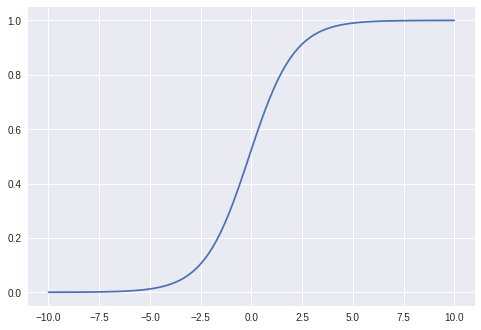

In [178]:
plt.plot(X,Y)
plt.show()

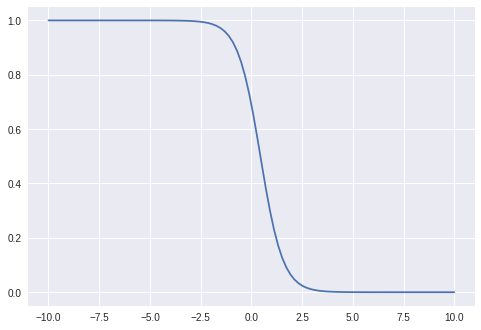

In [179]:
w = -1.8 #@param {type: "slider",min: -2, max:2,step:0.1}
#b is for shifting with respsect to zero
b = 0.8 #@param {type: "slider",min: -2, max:2,step:0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()

#Plotting Sigmoid function in 2D

$S_{w_1,w_2,b}(x_1,x_2) = 
\frac{1}{1+e^{-(w_1x_1 + w_2x_2+b)}}$

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1 + w2*x2 +b)))

In [181]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [183]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1,X2)

print(X1.shape, X2.shape, XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1=0.5
w2=0.5
b=0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

#Contour Plot

In [0]:
import matplotlib.colors

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

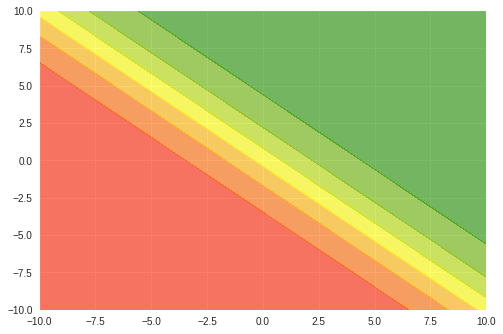

In [187]:
plt.contourf(XX1, XX2, Y, cmap= my_cmap, alpha=0.6)
plt.show()

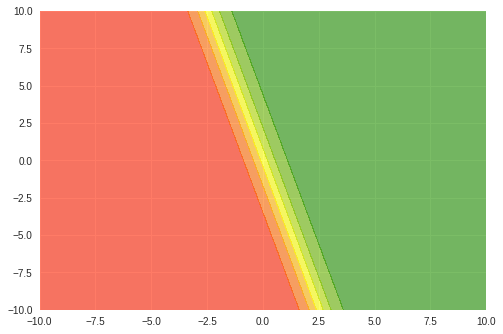

In [188]:
w1=2
w2=0.5
b=0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

plt.contourf(XX1, XX2, Y, cmap= my_cmap, alpha=0.6)
plt.show()

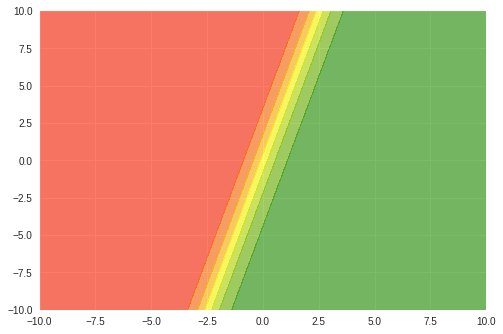

In [189]:
w1=2
w2=-0.5
b=0
Y = sigmoid_2d(XX1,XX2,w1,w2,b)

plt.contourf(XX1, XX2, Y, cmap= my_cmap, alpha=0.6)
plt.show()

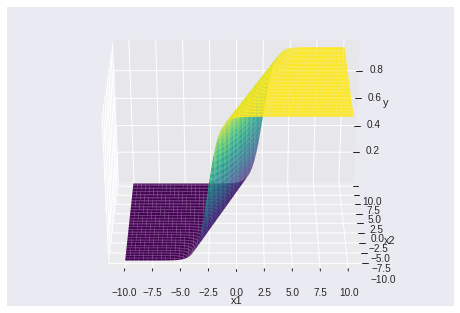

In [190]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1,XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#ax.view_init(10,270) #X1
#ax.view_init(10,180) #X2
#ax.view_init(30,0) #X2
ax.view_init(30,270) #X1

#Compute Loss for a Given Dataset

In [0]:
#Brute force way
w_unknown=0.5
b_unknown=0.25
X= np.random.random(25) * 20 - 10
Y= sigmoid(X,w_unknown,b_unknown)

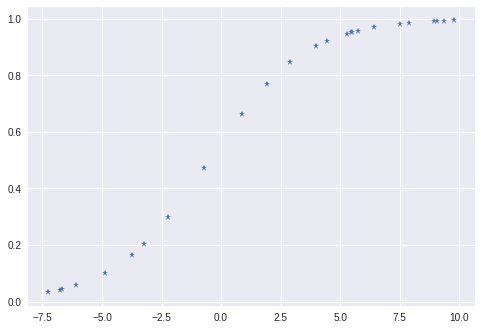

In [192]:
plt.plot(X,Y,'*')
plt.show()

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss = 0
  for x,y in zip(X,Y):
    loss +=(y - sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,101)

WW, BB = np.meshgrid(W,B)

Loss = np.zeros(WW.shape)

In [195]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j] = calculate_loss(X,Y,WW[i, j],BB[i, j])

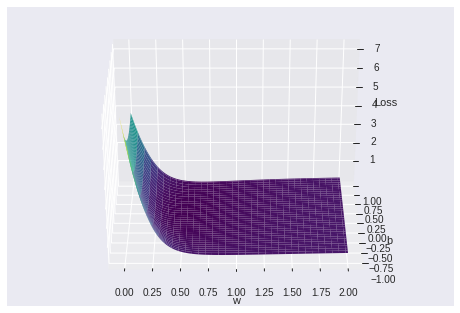

In [197]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30,180)#bias prospective
ax.view_init(30,270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i* Loss.shape[1])

In [199]:
print(i, j)

63 25


In [200]:
print(WW[i,j], BB[i, j])

0.5 0.26


#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w=None
    self.b=None
    
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x  
  
  def grad_b(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)  
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialize=True, display_loss=False):
    
    #initialize w, z
    if initialize:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    if display_loss:
      loss = {}
    
    #for i in range(epochs):
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
        
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
        
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self,X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#Fit for Toy data

##Toy Data plot 1/2 and 2/2

In [0]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,-1.25],[-2,-4],[1,5]])
Y = [1 ,1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1,X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

[[-0.32482088 -1.16653736]] [0.00470655]
[[ 0.07502401 -1.1528797 ]] [0.04585297]
[[ 0.41329446 -0.9895554 ]] [0.01597797]
[[ 0.80540342 -0.68027902]] [-0.00083658]
[[ 1.11048962 -0.26843882]] [-0.03337549]
[[ 1.12137128 -0.45493941]] [-0.09835993]
[[ 1.22547916 -0.35027211]] [-0.14865725]
[[ 1.24805838 -0.45216924]] [-0.19888358]
[[ 1.31302975 -0.41593658]] [-0.2396832]
[[ 1.34612527 -0.45599733]] [-0.27879218]
[[ 1.38915612 -0.45691752]] [-0.31320216]
[[ 1.42371635 -0.47270616]] [-0.34530431]
[[ 1.45771856 -0.48226522]] [-0.37474624]
[[ 1.48902115 -0.49263581]] [-0.40209325]
[[ 1.51853171 -0.50205712]] [-0.42753411]
[[ 1.54632616 -0.51098362]] [-0.4513006]
[[ 1.57260495 -0.51941425]] [-0.47357442]
[[ 1.59751847 -0.52740533]] [-0.49451301]
[[ 1.62119795 -0.53499924]] [-0.51425141]
[[ 1.64375674 -0.54223285]] [-0.53290634]
[[ 1.6652935  -0.54913819]] [-0.55057923]
[[ 1.68589461 -0.55574326]] [-0.56735867]
[[ 1.7056361  -0.56207265]] [-0.5833224]
[[ 1.72458521 -0.56814809]] [-0.59853895

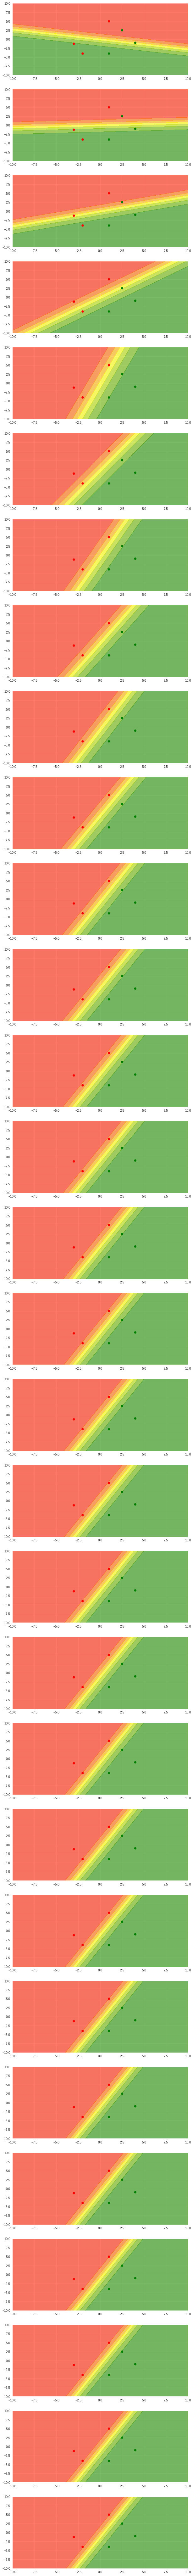

In [205]:
sn.fit(X,Y,1,0.05,True)
N = 30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)

#Load Data

In [206]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-03-31 05:33:46--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-03-31 05:33:46--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf46197709d5389cb8f23878d02.dl.dropboxusercontent.com/cd/0/inline/AeG5M-yMZhh2n-9eH--CLPcY2_mg6nilS2nykDyhHM1ApJ7v73Uf4eEpFS_rAM1MvUx7_aSaG_Zdv0yX9RhKT2c49zEPFHHAsHU_CzlqpW3IHATWc-NzQ16i8W9EAAysC0Y/file# [following]
--2019-03-31 05:33:46--  https://ucf46197709d5389cb8f23878d02.dl.dropboxusercontent.com/cd/0/inline/AeG5M-yMZhh2n-9eH--CLPcY2_mg6nilS2nykDyhHM1ApJ7v73Uf4eEpFS_rAM1MvUx7_aSaG_Zdv0yX9RhKT2c49zEPFHHA

In [207]:
!ls

mobile_cleaned.csv  mobile_cleaned.csv.1  mobile_cleaned.csv.2	sample_data


In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [210]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [211]:
data.shape

(341, 88)

In [212]:
#input train data set
X = data.drop('Rating',axis=1) #droping the Rating column with axis=1 for column
#output test data set
Y = data['Rating'] #we going to find the rating so creating the rating as o/p and test data for testing the trained dataset(X)
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,0,1,0,0,0,1


In [213]:
Y.head()

0    4.5
1    4.5
2    4.4
3    4.3
4    4.4
Name: Rating, dtype: float64

In [0]:
Y = data['Rating'].values

In [215]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
#binarise the data Y with threshold
threshold = 4.2 #4.1 set based on the available rating data which is between 0-5 where 4 is most avg value here so take it.
data['Class'] = (data['Rating']>=threshold).astype(np.int)

In [217]:
data['Class'] #now data is 0 or 1

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     1
11     0
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
311    0
312    0
313    1
314    1
315    0
316    0
317    0
318    0
319    0
320    0
321    1
322    1
323    1
324    0
325    0
326    1
327    0
328    0
329    0
330    0
331    1
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [218]:
#where data looks skewed or unbalanced most of are 1 we will do normalization 
#make sure to have 50-50 of 1's and 0's
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

#Standardisation

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
R = np.random.random([100,1])

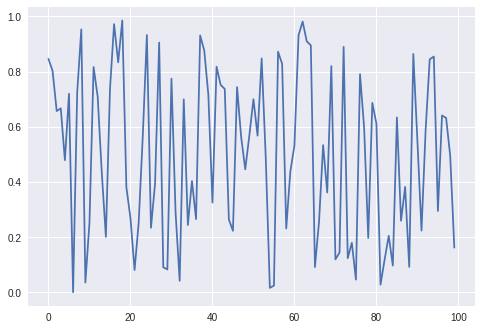

In [222]:
plt.plot(R)
plt.show()

In [223]:
np.mean(R)

0.5038043286318495

In [224]:
np.std(R)

0.3007991256918414

In [0]:
scaler = StandardScaler()

In [226]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [227]:
scaler.mean_

array([0.50380433])

In [0]:
RT = scaler.transform(R) 

In [229]:
np.mean(RT) #mean should be 0 of any standardised dataset

-5.262457136723242e-16

In [230]:
np.std(RT)#transformed R to standardized form. the data std should be 1 for standardised dataset

0.9999999999999998

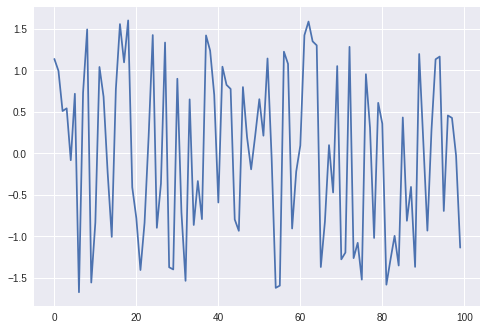

In [231]:
plt.plot(RT)
plt.show()

#Test/Train Split(1/2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [234]:
#split is to make sure have acces to 255 data not other 86
#to creating the model. what erver we can do with 255 data std other things
#but do not change the 86 datasets because we are going to test the 
#model with this 86 datasets
print(X_train.shape,X_test.shape)

(255, 87) (86, 87)


In [0]:
scaler = StandardScaler()

In [236]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


##Test/Train Split(2/2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [240]:
np.max(Y_scaled_train)

1.0

In [241]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.fit_transform(Y_test.reshape(-1,1))

In [243]:
np.max(Y_scaled_test)

0.9999999999999998

In [244]:
np.min(Y_scaled_test)

0.0

In [0]:
#convert real numbers to yes or no 0's and 1's
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [246]:
scaled_threshold

0.6363636363636365

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

#Fitting Data

In [0]:
sn = SigmoidNeuron()

**Loss Plot**

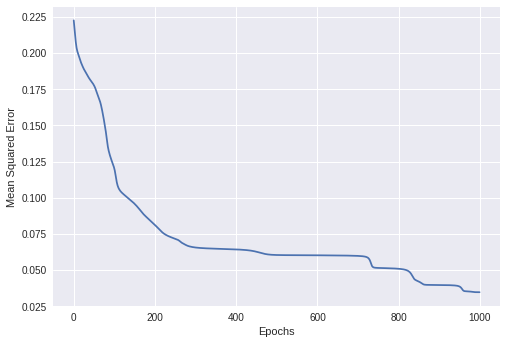

In [257]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 1000,learning_rate=0.015,display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test = accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [254]:
print(accuracy_train,accuracy_test)

0.7725490196078432 0.6744186046511628
